In [1]:
import pandas as pd
import numpy as np

#
TABLE_1 = "/media/array/covid_proj/final_markers/revamp/final_table.tsv"
# (matches of snips and feature),
# if there are more, than one feature for each SNP - take most significant
TABLE_2 = "/media/array/covid_proj/final_markers/revamp/signif_markers.tsv"
# Path to unnotmalized features
PATH_FEATURES = "../feature_processing/data/pheno_filtered_without_INT_sd3.tsv"
GWAS_TABLE = "../cvas_and_rvas/out_hail_gwas_com_sd3/gwas_{}.tsv"
SNPS_INFO = "./other_data/snps_genes.tsv"
SAVE_REGR = "draw_data/regr_{}_{}.tsv"
HIST_FEATURES = "draw_data/features_for_hist.tsv"

chr2gene = {
    "chr10:71799129": "CDH23",
    "chr10:71799195": "CDH23",
    "chr16:88738516": "PIEZO1",
    "chr19:50259161": "MYH14",
    "chr19:50263450": "MYH14",
    "chr2:219280564": "DNAJB2",
    "chr22:20992196": "LZTR1",
    "chr3:38894643": "SCN11A",
    "chr3:68997990": "EOGT",
    "chr6:16306520": "ATXN1",
    "chr6:51830849": "PKHD1",
    "chr9:132278286": "SETX",
    "chr9:98299383": "GABBR2",
}

### Read feature and genetic information for every human

In [2]:
data = pd.read_csv(TABLE_1, sep="\t")
print(data.shape)
data.head()

(840, 69)


,launch_blood_id,launch_id,man_id,storm,crp,leuk,neut,l,creat,crp_dynam,...,rs33985936,rs4855544,rs16885,rs1571084,rs41273925,rs11243705,rs4747194,rs34600315,rs1651553,rs112544
0,104555,10,597619,0.0,-1.189100,0.407514,-0.170263,1.684973,-0.333425,0.147550,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,1046472,10,263436,1.0,0.518273,-0.061791,-0.143870,1.085128,0.155156,-1.084957,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0
2,1046474,10,695634,1.0,0.718649,0.966989,1.212766,-0.351837,-0.466717,-0.942933,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0
3,1046475,10,694025,1.0,0.456211,0.607381,0.349110,0.680182,-0.372332,-0.055568,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0
4,1046476,10,74079,1.0,1.264784,1.070757,1.098427,0.857996,2.194859,-1.972522,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0


### Read information about significant SNPs

In [3]:
data_match = pd.read_csv(
    TABLE_2, sep="\t", header=None, names=["chr", "pos", "mut", "rs", "pval", "feat"]
)
print(data_match.shape)
data_match

(15, 6)


,chr,pos,mut,rs,pval,feat
0,chr10,71799129,"[""G"",""A""]",rs4747194,5.836900e-05,l
1,chr10,71799195,"[""C"",""T""]",rs4747195,7.844800e-05,l
2,chr16,88738516,"[""TC"",""T""]",rs34600315,3.729500e-05,CT_start
3,chr19,50259161,"[""A"",""G""]",rs1651553,1.447100e-07,leuk_1
4,chr19,50259161,"[""A"",""G""]",rs1651553,3.546600e-07,neut_1
5,chr19,50263450,"[""T"",""C""]",rs1529492,4.002500e-07,leuk_1
6,chr19,50263450,"[""T"",""C""]",rs1529492,9.201800e-07,neut_1
7,chr2,219280564,"[""C"",""T""]",rs2276638,9.840800e-05,leuk_1
8,chr22,20992196,"[""T"",""C""]",rs112544,4.879000e-05,neut_1
9,chr3,38894643,"[""C"",""T""]",rs33985936,2.495000e-05,CT_start


Get beta constants from GWAS'es: 

In [4]:
data_match["beta"] = np.nan
for key, val in data_match.iterrows():
    try:
        gwas_data = pd.read_csv(GWAS_TABLE.format(val.feat), sep="\t")
        beta = gwas_data[gwas_data.locus == f"{val.chr}:{val.pos}"].beta
        pval_two = gwas_data[gwas_data.locus == f"{val.chr}:{val.pos}"].p_value
        data_match.at[key, "beta"] = beta
    except FileNotFoundError:
        pass
data_match

,chr,pos,mut,rs,pval,feat,beta
0,chr10,71799129,"[""G"",""A""]",rs4747194,5.836900e-05,l,0.24603
1,chr10,71799195,"[""C"",""T""]",rs4747195,7.844800e-05,l,0.24157
2,chr16,88738516,"[""TC"",""T""]",rs34600315,3.729500e-05,CT_start,0.21494
3,chr19,50259161,"[""A"",""G""]",rs1651553,1.447100e-07,leuk_1,0.31679
4,chr19,50259161,"[""A"",""G""]",rs1651553,3.546600e-07,neut_1,0.31150
5,chr19,50263450,"[""T"",""C""]",rs1529492,4.002500e-07,leuk_1,0.30547
6,chr19,50263450,"[""T"",""C""]",rs1529492,9.201800e-07,neut_1,0.30038
7,chr2,219280564,"[""C"",""T""]",rs2276638,9.840800e-05,leuk_1,-0.29128
8,chr22,20992196,"[""T"",""C""]",rs112544,4.879000e-05,neut_1,0.23406
9,chr3,38894643,"[""C"",""T""]",rs33985936,2.495000e-05,CT_start,-0.24135


### Annotate SNPs using GTEx

In [5]:
data_match.rs.apply(lambda x: f"https://gtexportal.org/home/snp/{x}")

0      https://gtexportal.org/home/snp/rs4747194
1      https://gtexportal.org/home/snp/rs4747195
2     https://gtexportal.org/home/snp/rs34600315
3      https://gtexportal.org/home/snp/rs1651553
4      https://gtexportal.org/home/snp/rs1651553
5      https://gtexportal.org/home/snp/rs1529492
6      https://gtexportal.org/home/snp/rs1529492
7      https://gtexportal.org/home/snp/rs2276638
8       https://gtexportal.org/home/snp/rs112544
9     https://gtexportal.org/home/snp/rs33985936
10     https://gtexportal.org/home/snp/rs4855544
11       https://gtexportal.org/home/snp/rs16885
12     https://gtexportal.org/home/snp/rs1571084
13    https://gtexportal.org/home/snp/rs41273925
14    https://gtexportal.org/home/snp/rs11243705
Name: rs, dtype: object

In [6]:
# https://gtexportal.org/home/snp/
gtexes = {
    "rs2276638": "ABCB6 (Testis), ATG9A (Skin - Sun Exposed (Lower leg)), GLB1L (Testis), PTPRN (Whole Blood, Different Parts of Brain), RESP18 (Different Parts of Brain)",
    "rs33985936": "SCN11A (Several Tissues), TTC21A (Several Tissues), WDR48 (Several Tissues)",
    "rs4855544": "ARL6IP5 (Several Tissues), CTD-2013N24.2 (Artery - Tibial), EOGT (Several Tissues), LMOD3 (Artery - Tibial, Esophagus - Mucosa), TMF1 (Esophagus - Mucosa, Thyroid), UBA3 (Skin - Sun Exposed (Lower leg) and Not Sun Exposed (Suprapubic))",
    "rs16885": "No significant eQTLs",
    "rs1571084": "PKHD1 (Skin - Sun Exposed (Lower leg) and Not Sun Exposed (Suprapubic))",
    "rs41273925": "TBC1D2 (Thyroid, Cells - Cultured fibroblasts)",
    "rs11243705": "SETX (Several Tissues)",
    "rs4747194": "CDH23 (Colon - Transverse, Testis), PSAP (Several Tissues)",
    "rs4747195": "CDH23 (Colon - Transverse, Testis), PSAP (Several Tissues)",
    "rs34600315": "SNAI3-AS1 (Heart - Atrial Appendage), RP5-1142A6.9 (Whole Blood), PIEZO1 (Whole Blood)",
    "rs1651553": "No significant eQTLs",
    "rs1529492": "No significant eQTLs",
    "rs112544": "AIFM3 (Pituitary), LZTR1 (Several Tissues), P2RX6 (Several Tissues), THAP7 (Pituitary), THAP7-AS1 (Several Tissues)",
}

### Annotate SNPs using ensemble service

In [7]:
for i in data_match.rs.apply(
    lambda x: f"https://www.ensembl.org/Homo_sapiens/Variation/Mappings?db=core;v={x}"
):
    print(i)

https://www.ensembl.org/Homo_sapiens/Variation/Mappings?db=core;v=rs4747194
https://www.ensembl.org/Homo_sapiens/Variation/Mappings?db=core;v=rs4747195
https://www.ensembl.org/Homo_sapiens/Variation/Mappings?db=core;v=rs34600315
https://www.ensembl.org/Homo_sapiens/Variation/Mappings?db=core;v=rs1651553
https://www.ensembl.org/Homo_sapiens/Variation/Mappings?db=core;v=rs1651553
https://www.ensembl.org/Homo_sapiens/Variation/Mappings?db=core;v=rs1529492
https://www.ensembl.org/Homo_sapiens/Variation/Mappings?db=core;v=rs1529492
https://www.ensembl.org/Homo_sapiens/Variation/Mappings?db=core;v=rs2276638
https://www.ensembl.org/Homo_sapiens/Variation/Mappings?db=core;v=rs112544
https://www.ensembl.org/Homo_sapiens/Variation/Mappings?db=core;v=rs33985936
https://www.ensembl.org/Homo_sapiens/Variation/Mappings?db=core;v=rs4855544
https://www.ensembl.org/Homo_sapiens/Variation/Mappings?db=core;v=rs16885
https://www.ensembl.org/Homo_sapiens/Variation/Mappings?db=core;v=rs1571084
https://www.e

In [8]:
consequences = {
    "rs2276638": "intron variant, non coding transcript variant, upstream gene variant, downstream gene variant",
    "rs33985936": "missense variant, NMD transcript variant, 3 prime UTR variant",
    "rs4855544": "intron variant, NMD transcript variant, non coding transcript variant",
    "rs16885": "missense variant",
    "rs1571084": "intron variant",
    "rs41273925": "intron variant, non coding transcript variant, downstream gene variant",
    "rs11243705": "intron variant, upstream gene variant, downstream gene variant",
    "rs4747194": "missense variant, non coding transcript exon variant, 3 prime UTR variant, NMD transcript variant",
    "rs4747195": "missense variant, non coding transcript exon variant, 3 prime UTR variant, NMD transcript variant",
    "rs34600315": "non coding transcript exon variant, intron variant, upstream gene variant",
    "rs1651553": "synonymous variant, downstream gene variant",
    "rs1529492": "intron variant, downstream gene variant",
    "rs112544": "intron variant, non coding transcript variant, NMD transcript variant, upstream gene variant, downstream gene variant",
}

for cons in consequences:
    consequences.update({cons: consequences[cons].split(", ")[0]})
consequences

{'rs2276638': 'intron variant',
 'rs33985936': 'missense variant',
 'rs4855544': 'intron variant',
 'rs16885': 'missense variant',
 'rs1571084': 'intron variant',
 'rs41273925': 'intron variant',
 'rs11243705': 'intron variant',
 'rs4747194': 'missense variant',
 'rs4747195': 'missense variant',
 'rs34600315': 'non coding transcript exon variant',
 'rs1651553': 'synonymous variant',
 'rs1529492': 'intron variant',
 'rs112544': 'intron variant'}

And append found information:

In [9]:
data_match["gene"] = data_match.chr.str.cat(
    list(data_match.pos.values.astype(str)), sep=":", na_rep="-"
).replace(chr2gene)
data_match["gtex"] = data_match.rs.map(gtexes)
data_match["consequences"] = data_match.rs.map(consequences)
data_match.chr = data_match.chr.apply(lambda x: int(x[3:]))
data_match = data_match.sort_values(by="chr")
data_match.to_csv(SNPS_INFO, sep="\t", index=False)
display(data_match)
data_match = data_match.drop(["gene", "gtex"], axis=1)
data_match

,chr,pos,mut,rs,pval,feat,beta,gene,gtex,consequences
7,2,219280564,"[""C"",""T""]",rs2276638,9.840800e-05,leuk_1,-0.29128,DNAJB2,"ABCB6 (Testis), ATG9A (Skin - Sun Exposed (Low...",intron variant
9,3,38894643,"[""C"",""T""]",rs33985936,2.495000e-05,CT_start,-0.24135,SCN11A,"SCN11A (Several Tissues), TTC21A (Several Tiss...",missense variant
10,3,68997990,"[""G"",""A""]",rs4855544,2.883500e-05,l,0.23315,EOGT,"ARL6IP5 (Several Tissues), CTD-2013N24.2 (Arte...",intron variant
11,6,16306520,"[""G"",""A""]",rs16885,1.278800e-05,CT_start,0.27554,ATXN1,No significant eQTLs,missense variant
12,6,51830849,"[""A"",""T""]",rs1571084,4.297300e-05,CT_start,0.21063,PKHD1,PKHD1 (Skin - Sun Exposed (Lower leg) and Not ...,intron variant
13,9,98299383,"[""G"",""C""]",rs41273925,2.060200e-05,CT_start,0.37624,GABBR2,"TBC1D2 (Thyroid, Cells - Cultured fibroblasts)",intron variant
14,9,132278286,"[""T"",""C""]",rs11243705,8.181100e-06,crp,0.30593,SETX,SETX (Several Tissues),intron variant
0,10,71799129,"[""G"",""A""]",rs4747194,5.836900e-05,l,0.24603,CDH23,"CDH23 (Colon - Transverse, Testis), PSAP (Seve...",missense variant
1,10,71799195,"[""C"",""T""]",rs4747195,7.844800e-05,l,0.24157,CDH23,"CDH23 (Colon - Transverse, Testis), PSAP (Seve...",missense variant
2,16,88738516,"[""TC"",""T""]",rs34600315,3.729500e-05,CT_start,0.21494,PIEZO1,"SNAI3-AS1 (Heart - Atrial Appendage), RP5-1142...",non coding transcript exon variant


,chr,pos,mut,rs,pval,feat,beta,consequences
7,2,219280564,"[""C"",""T""]",rs2276638,9.840800e-05,leuk_1,-0.29128,intron variant
9,3,38894643,"[""C"",""T""]",rs33985936,2.495000e-05,CT_start,-0.24135,missense variant
10,3,68997990,"[""G"",""A""]",rs4855544,2.883500e-05,l,0.23315,intron variant
11,6,16306520,"[""G"",""A""]",rs16885,1.278800e-05,CT_start,0.27554,missense variant
12,6,51830849,"[""A"",""T""]",rs1571084,4.297300e-05,CT_start,0.21063,intron variant
13,9,98299383,"[""G"",""C""]",rs41273925,2.060200e-05,CT_start,0.37624,intron variant
14,9,132278286,"[""T"",""C""]",rs11243705,8.181100e-06,crp,0.30593,intron variant
0,10,71799129,"[""G"",""A""]",rs4747194,5.836900e-05,l,0.24603,missense variant
1,10,71799195,"[""C"",""T""]",rs4747195,7.844800e-05,l,0.24157,missense variant
2,16,88738516,"[""TC"",""T""]",rs34600315,3.729500e-05,CT_start,0.21494,non coding transcript exon variant


We want to remove one of the 2 lines for 19:50259161, 19:50263450 (cause they are for 2 features, we want take the most significant - leuk).

In [10]:
display(data_match[data_match.pos == 50259161]["feat"])
display(data_match[data_match.pos == 50263450]["feat"])
data_match = data_match.drop([4, 6])
print(data_match.shape)

3    leuk_1
4    neut_1
Name: feat, dtype: object

5    leuk_1
6    neut_1
Name: feat, dtype: object

(13, 8)


In [11]:
data_match.chr = data_match.chr.apply(lambda x: "chr" + str(x))

## Applying to humans

Compute out score for every human:

In [12]:
def check_exceptions(string):
    return "leuk" in string or "neut" in string or "CT" in string or "crp" in string


data["SCORE"] = 0

for key, val in data_match.iterrows():
    print(val.rs)
    if val.rs in data.columns:
        allele = None
        if not check_exceptions(val.feat):
            print(val.feat)
            allele = 2 - data[val.rs] if val.beta > 0 else data[val.rs]
        else:
            allele = data[val.rs] if val.beta > 0 else 2 - data[val.rs]
        data.SCORE += allele * np.abs(val.beta)
data

rs2276638
rs33985936
rs4855544
l
rs16885
rs1571084
rs41273925
rs11243705
rs4747194
l
rs4747195
rs34600315
rs1651553
rs1529492
rs112544


,launch_blood_id,launch_id,man_id,storm,crp,leuk,neut,l,creat,crp_dynam,...,rs4855544,rs16885,rs1571084,rs41273925,rs11243705,rs4747194,rs34600315,rs1651553,rs112544,SCORE
0,104555,10,597619,0.0,-1.189100,0.407514,-0.170263,1.684973,-0.333425,0.147550,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.51012
1,1046472,10,263436,1.0,0.518273,-0.061791,-0.143870,1.085128,0.155156,-1.084957,...,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.53805
2,1046474,10,695634,1.0,0.718649,0.966989,1.212766,-0.351837,-0.466717,-0.942933,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.76957
3,1046475,10,694025,1.0,0.456211,0.607381,0.349110,0.680182,-0.372332,-0.055568,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,3.53177
4,1046476,10,74079,1.0,1.264784,1.070757,1.098427,0.857996,2.194859,-1.972522,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,3.30486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,114118,11,660644,1.0,-0.590099,0.022753,0.203424,0.150094,-1.439005,-0.234079,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0,2.70110
836,114119,11,660141,1.0,1.089839,-0.143495,0.022812,0.399132,-1.050828,0.869057,...,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,3.49052
837,114120,11,29478,1.0,-0.677290,NaN,0.562742,0.392323,NaN,0.088324,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,3.06462
838,114121,11,660907,1.0,-0.038910,1.256110,1.172942,1.495846,-0.616918,-0.716887,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.63261


In [13]:
data["top_10_score"] = data.SCORE > data.SCORE.quantile(0.9)
data.head()

,launch_blood_id,launch_id,man_id,storm,crp,leuk,neut,l,creat,crp_dynam,...,rs16885,rs1571084,rs41273925,rs11243705,rs4747194,rs34600315,rs1651553,rs112544,SCORE,top_10_score
0,104555,10,597619,0.0,-1.189100,0.407514,-0.170263,1.684973,-0.333425,0.147550,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.51012,False
1,1046472,10,263436,1.0,0.518273,-0.061791,-0.143870,1.085128,0.155156,-1.084957,...,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.53805,False
2,1046474,10,695634,1.0,0.718649,0.966989,1.212766,-0.351837,-0.466717,-0.942933,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,2.76957,False
3,1046475,10,694025,1.0,0.456211,0.607381,0.349110,0.680182,-0.372332,-0.055568,...,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0,3.53177,False
4,1046476,10,74079,1.0,1.264784,1.070757,1.098427,0.857996,2.194859,-1.972522,...,0.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,3.30486,False


## Regression and pictures

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import *
from statsmodels.stats.multitest import fdrcorrection

/home/achangalidi/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


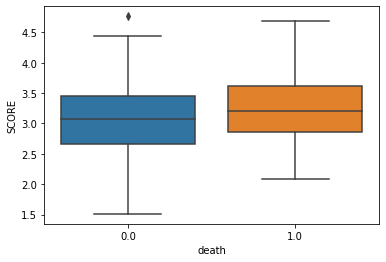

In [15]:
sns.boxplot(data.death, data.SCORE)
plt.show()

/home/achangalidi/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


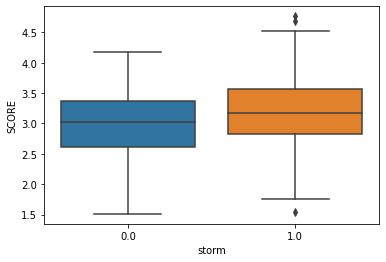

In [16]:
sns.boxplot(data.storm, data.SCORE)
plt.show()

## Top10 analysis

/home/achangalidi/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


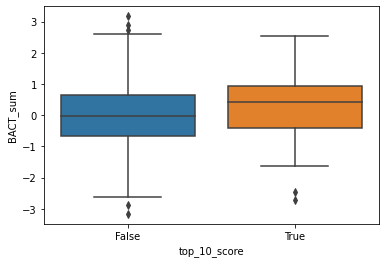

In [17]:
sns.boxplot(data.top_10_score, data.BACT_sum)
plt.show()

/home/achangalidi/miniconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


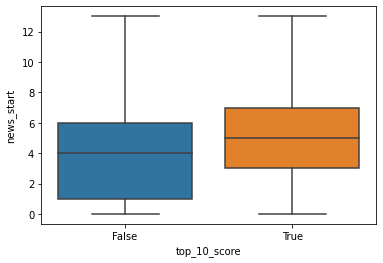

In [18]:
sns.boxplot(data.top_10_score, data.news_start)
plt.show()

## Use unnormalized features

In [19]:
phenos = pd.read_csv(PATH_FEATURES, sep="\t")
phenos.head()

,launch_blood_id,launch_id,man_id,storm,ill_to_hosp,temp,chd,aks,cvd,news_1,...,fer_max_min,d_dym_max_min,creat_max_min,glu_max_min,pcr_max_min,news,news_max_min,week_to_hosp,pc1,pc2
0,104555,10,597619,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.00,5.0,NaN,12.0,0.0,0.0,0.0,-5.251393,0.307942
1,1046472,10,263436,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.77,0.0,NaN,NaN,0.0,0.0,0.0,-1.722065,-1.496355
2,1046474,10,695634,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.32,0.0,NaN,0.0,2.0,0.0,1.0,1.934327,-1.862358
3,1046475,10,694025,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.64,8.0,0.6,NaN,0.0,0.0,1.0,0.398871,-2.025129
4,1046476,10,74079,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,5.84,NaN,2.8,8.0,0.0,0.0,1.0,3.710759,2.447661


In [20]:
sum(phenos.severity.isna())

23

In [21]:
new_table = pd.merge(
    phenos,
    data[
        [
            "launch_blood_id",
            "SCORE",
            "top_10_score",
            "rs2276638",
            "rs33985936",
            "rs4855544",
            "rs16885",
            "rs1571084",
            "rs41273925",
            "rs11243705",
            "rs4747194",
            "rs34600315",
            "rs1651553",
            "rs112544",
        ]
    ],
    on="launch_blood_id",
)
new_table

,launch_blood_id,launch_id,man_id,storm,ill_to_hosp,temp,chd,aks,cvd,news_1,...,rs33985936,rs4855544,rs16885,rs1571084,rs41273925,rs11243705,rs4747194,rs34600315,rs1651553,rs112544
0,104555,10,597619,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
1,1046472,10,263436,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,1.0
2,1046474,10,695634,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0
3,1046475,10,694025,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,1.0
4,1046476,10,74079,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,114118,11,660644,1.0,8.0,1.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,2.0
836,114119,11,660141,1.0,7.0,1.0,0.0,0.0,0.0,4.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0
837,114120,11,29478,1.0,3.0,1.0,0.0,0.0,0.0,4.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0
838,114121,11,660907,1.0,6.0,1.0,1.0,1.0,1.0,2.0,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0


### Save tables: 
Allele + feature to build regression boxplots

In [22]:
for key, val in data_match.iterrows():
    try:
        to_save = pd.DataFrame([new_table[val.rs], new_table[val.feat]]).T
    except KeyError:
        pass
    name = SAVE_REGR.format(val.rs, val.feat)
    to_save.to_csv(name, sep="\t", index=False)
    print(f"Saved to {name}")

Saved to draw_data/regr_rs2276638_leuk_1.tsv
Saved to draw_data/regr_rs33985936_CT_start.tsv
Saved to draw_data/regr_rs4855544_l.tsv
Saved to draw_data/regr_rs16885_CT_start.tsv
Saved to draw_data/regr_rs1571084_CT_start.tsv
Saved to draw_data/regr_rs41273925_CT_start.tsv
Saved to draw_data/regr_rs11243705_crp.tsv
Saved to draw_data/regr_rs4747194_l.tsv
Saved to draw_data/regr_rs4747195_l.tsv
Saved to draw_data/regr_rs34600315_CT_start.tsv
Saved to draw_data/regr_rs1651553_leuk_1.tsv
Saved to draw_data/regr_rs1529492_leuk_1.tsv
Saved to draw_data/regr_rs112544_neut_1.tsv


In [23]:
all_cols = list(new_table.columns)

id_cols = ["man_id", "launch_id"]

categorical_cols = [
    "BACT_sum",
    "CT_features",
    "CT_init",
    "CT_out",
    "CT_start",
    "news_max_min",
    "age",
    "aks",
    "chd",
    "com_index",
    "current_situation",
    "cvd",
    "days_to_EKMO",
    "death",
    "imv_days",
    "resp_dis_init",
    "resp_dis_out",
    "resp_dis_start",
    "severity",
    "sex",
    "smell_taste_loss",
    "storm",
    "systemic_corticosteroids_usage",
    "temp",
    "ten_immortality",
    "weakness",
    "week_to_hosp",
    "pc1",
    "pc2",
]

categorical_to_binary = [
    "news_max_min",
    "CT_features",
    "aks",
    "chd",
    "current_situation",
    "cvd",
    "death",
    "smell_taste_loss",
    "storm",
    "systemic_corticosteroids_usage",
    "temp",
    "weakness",
    "week_to_hosp",
]

dont_check_cols = ["treatment", "date_in", "date_out"]

cont_cols = set(all_cols) - set(id_cols) - set(categorical_cols) - set(dont_check_cols)
cat_cols = (set(all_cols) & set(categorical_to_binary)).union(
    set(["BACT_sum", "com_index", "death", "severity", "storm"])
)

In [24]:
cont_cols = {
    "news_max_min",
    "creat_max_min",
    "crp_max_min",
    "d_dym_max_min",
    "fer_max_min",
    "glu_max_min",
    "il6_max_min",
    "ill_to_hosp",
    "l_max_min",
    "ldh_max_min",
    "leuk_max_min",
    "neut_max_min",
    "pcr_max_min",
}

In [25]:
def draw_hist(series, parameter):
    sns.distplot(series[parameter], color="seagreen")
    sns.distplot(series[~parameter], color="thistle")
    plt.legend(labels=["top-10", "bottom-90"])


import warnings

warnings.filterwarnings("ignore")

## Test continuos features

Here we use Mann-Whitney U test.

In [26]:
def shorten_float(p):
    if 0.00001 < abs(p - round(p, 3)) < 0.001:
        return round(p, 5)
    elif abs(p - round(p, 3)) >= 0.001:
        return round(p, 3)
    return p


def count_pval(table, feat, top_score):
    table = table[~table[feat].isna()]
    score = table[top_score]
    w, p = mannwhitneyu(table[score][feat], table[~score][feat])
    return p


def hist_pval(table, feat, top_score, feature_name, p, print_all=False):
    score = table[top_score]
    print(f"|| {feature_name} ||")
    p = shorten_float(p)
    print(f"Pval: {p}")
    if p < 0.05:
        draw_hist(table[feat], score)
        plt.show()
        return True
    return False


pvals_top_10_score = []
pvals_top_10_RAL = []

# Count pvals
for feat in list(cont_cols):
    print(feat)
    pvals_top_10_score.append(count_pval(new_table, feat, "top_10_score"))

# FDR adjustment
_, pvals_top_10_score = fdrcorrection(pvals_top_10_score)

# Draw significant
for feat, p_1, p_2 in zip(list(cont_cols), pvals_top_10_score, pvals_top_10_RAL):
    print(f"=======\n{feat}\n=======")
    a = hist_pval(new_table, feat, "top_10_score", "SCORE:", p_1, True)
    cor, pval = spearmanr(new_table["SCORE"], new_table[feat], nan_policy="omit")
    print(f"Correlation with score: {shorten_float(cor)}, pval = {shorten_float(pval)}")

    if a:
        print("\n\n\n")

l_max_min
ldh_max_min
fer_max_min
creat_max_min
d_dym_max_min
news_max_min
neut_max_min
pcr_max_min
glu_max_min
il6_max_min
crp_max_min
ill_to_hosp
leuk_max_min


## Test categorical features

Here we use chi2_contingency test from scipy package.

But before that, binarize categorical features (0 or 1).

In [27]:
def scale(l):
    if min(l) >= 0 and max(l) <= 1 and max(l) != 0.2:
        return l
    x_min = 0 if min(l) > 0 else min(l)
    x_max = 1 if max(l) < 1 else max(l)
    if max(l) == 0.2:
        x_max = 0.2
    return (l - x_min) / (x_max - x_min)


for col in categorical_to_binary:
    new_table[col] = scale(new_table[col]).round()

death
|| SCORE: ||
Pval: 0.01728
Pval_adj: 0.01728


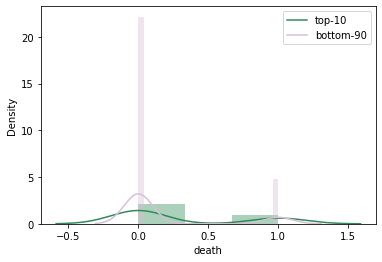





storm
|| SCORE: ||
Pval: 0.00133
Pval_adj: 0.003992878885756394


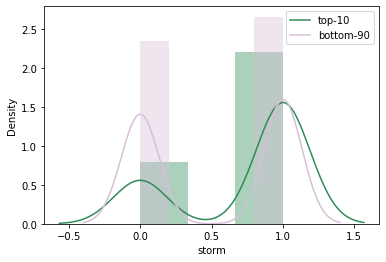





severity
|| SCORE: ||
Pval: 0.01322
Pval_adj: 0.01728


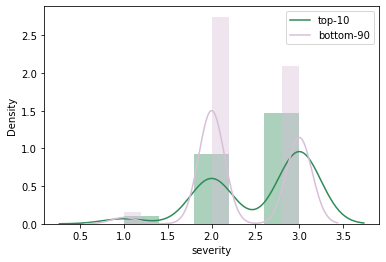

In [28]:
def return_difference(a, b):
    return set(a) - set(b), set(b) - set(a)


def count_pval_cat(table, feat, top_score):
    score = table[top_score]
    a = table[score].groupby(feat).count().sort_index()["launch_blood_id"]
    b = table[~score].groupby(feat).count().sort_index()["launch_blood_id"]

    needed_indexes = return_difference(b.index, a.index)
    if needed_indexes[0]:
        a = a.append(
            pd.Series(
                [0 for i in range(len(needed_indexes[0]))],
                index=list(needed_indexes[0]),
            )
        ).sort_index()
    if needed_indexes[1]:
        b = b.append(
            pd.Series(
                [0 for i in range(len(needed_indexes[1]))],
                index=list(needed_indexes[1]),
            )
        ).sort_index()
    needed_indexes = return_difference(a.index, b.index)

    a = list(a)
    b = list(b)
    w, p, _, _ = chi2_contingency([list(a), list(b)])
    return p


def hist_pval_cat(table, feat, top_score, feature_name, p, p_a, print_all=False):
    score = table[top_score]
    print(f"|| {feature_name} ||")
    p = shorten_float(p)
    p_a = shorten_float(p_a)
    print(f"Pval: {p}")
    print(f"Pval_adj: {p_a}")
    if p < 0.06:
        draw_hist(table[feat], score)
        plt.show()
        return True
    return False


pvals_top_10_score = []

# Count pvals
for feat in ["death", "storm", "severity"]:
    pvals_top_10_score.append(count_pval_cat(new_table, feat, "top_10_score"))

# FDR adjustment
_, pvals_top_10_score_adj = fdrcorrection(pvals_top_10_score)

# Draw significant
for feat, p_1, p_1_a in zip(
    ["death", "storm", "severity"],
    pvals_top_10_score,
    pvals_top_10_score_adj,
):
    print(f"=======\n{feat}\n=======")
    a = hist_pval_cat(new_table, feat, "top_10_score", "SCORE:", p_1, p_1_a, True)
    if a:
        print("\n\n\n")

### Save scores for histograms

In [29]:
to_save = new_table[
    list(cat_cols) + list(cont_cols) + ["top_10_score", "SCORE"]
]
to_save.top_10_score = to_save.top_10_score.apply(lambda x: 1 if x else 0)
display(to_save)
to_save.to_csv(HIST_FEATURES, sep="\t", index=False)

,cvd,current_situation,news_max_min,aks,severity,week_to_hosp,death,systemic_corticosteroids_usage,CT_features,storm,...,news_max_min,neut_max_min,pcr_max_min,glu_max_min,il6_max_min,crp_max_min,ill_to_hosp,leuk_max_min,top_10_score,SCORE
0,NaN,1.0,0.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.68,12.00,NaN,0.00,10.6,NaN,6.24,0,1.51012
1,NaN,1.0,0.0,NaN,2.0,0.0,0.0,0.0,1.0,1.0,...,0.0,2.44,NaN,NaN,101.00,121.9,NaN,2.54,0,2.53805
2,NaN,1.0,0.0,NaN,3.0,1.0,0.0,NaN,1.0,1.0,...,0.0,8.40,0.00,NaN,222.31,108.8,NaN,7.33,0,2.76957
3,NaN,1.0,0.0,NaN,3.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.69,NaN,0.60,16.78,145.0,NaN,3.78,0,3.53177
4,NaN,1.0,0.0,NaN,3.0,1.0,0.0,NaN,0.0,1.0,...,0.0,8.22,8.00,2.80,159.15,235.7,NaN,7.98,0,3.30486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,NaN,1.0,1.0,NaN,2.0,1.0,0.0,NaN,1.0,1.0,...,1.0,3.86,0.00,0.00,62.90,35.3,8.0,3.21,0,2.70110
836,NaN,1.0,0.0,NaN,2.0,0.0,0.0,NaN,1.0,1.0,...,0.0,2.04,7.90,5.75,131.92,154.8,7.0,1.66,0,3.49052
837,NaN,NaN,0.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,...,0.0,0.00,0.00,NaN,10.68,11.8,3.0,NaN,0,3.06462
838,NaN,1.0,0.0,NaN,2.0,0.0,0.0,NaN,1.0,1.0,...,0.0,8.24,7.01,1.13,83.90,80.9,6.0,6.05,0,2.63261
